In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Image preprocessing function
def preprocess_image(image_path, target_size=(128, 128)):
    image = imread(image_path)
    image_resized = resize(image, target_size, anti_aliasing=True)
    return image_resized.flatten()

# Load and preprocess images
def load_and_preprocess_images(csv_data, base_path):
    images = []
    for path in csv_data['path']:
        full_path = f"{base_path}/{path}"
        image = preprocess_image(full_path)
        images.append(image)
    return np.array(images)

# Load the CSV files
subhashree_csv_path = '/content/drive/MyDrive/DatasetFile-augmented-subhashree.csv'
spandan_csv_path = '/content/drive/MyDrive/DatasetFile-augmented-spandan.csv'

# Read the CSV files
subhashree_data = pd.read_csv(subhashree_csv_path)
spandan_data = pd.read_csv(spandan_csv_path)

# Define base paths (update the base path to your actual path)
base_path = '/content/drive/MyDrive/'  # Update this to your actual base path if different

# Preprocess subhashree and spanadan images
subhashree_images = load_and_preprocess_images(subhashree_data, base_path)
spandan_images = load_and_preprocess_images(spandan_data, base_path)

# Split subhashree images into training and testing sets (80% train, 20% test)
train_images, test_images = train_test_split(subhashree_images, test_size=0.2, random_state=42)

# Combine test images of subhashree and spanadan for testing
combined_test_images = np.vstack((test_images, spandan_images))

# Define the true labels
true_labels = np.array([1] * len(test_images) + [0] * len(spandan_images))
print(len(true_labels))
# Train the One-Class SVM with the best parameters
best_nu = 0.1
best_gamma = 0.0055
kernel ='rbf'

ocsvm = OneClassSVM(nu=best_nu, gamma=best_gamma, kernel='rbf')
ocsvm.fit(train_images)

# Make predictions on the combined test set
predictions = ocsvm.predict(combined_test_images)

# Convert predictions to binary labels (1 for inliers, 0 for outliers)
binary_predictions = (predictions == 1).astype(int)
print(len(binary_predictions))
# Evaluate the model
accuracy = accuracy_score(true_labels, binary_predictions)
conf_matrix = confusion_matrix(true_labels, binary_predictions)
class_report = classification_report(true_labels, binary_predictions)

print("Final Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


505
505
Final Model Accuracy: 0.8673267326732673
Confusion Matrix:
 [[436   0]
 [ 67   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       436
           1       1.00      0.03      0.06        69

    accuracy                           0.87       505
   macro avg       0.93      0.51      0.49       505
weighted avg       0.88      0.87      0.81       505



In [ ]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Image preprocessing function
def preprocess_image(image_path, target_size=(128, 128)):
    image = imread(image_path)
    image_resized = resize(image, target_size, anti_aliasing=True)
    return image_resized.flatten()

# Load and preprocess images
def load_and_preprocess_images(csv_data, base_path):
    images = []
    for path in csv_data['path']:
        full_path = f"{base_path}/{path}"
        image = preprocess_image(full_path)
        images.append(image)
    return np.array(images)

# Load the CSV files
subhashree_csv_path = '/content/drive/MyDrive/DatasetFile-augmented-subhashree.csv'
spandan_csv_path = '/content/drive/MyDrive/DatasetFile-augmented-spandan.csv'

# Read the CSV files
subhashree_data = pd.read_csv(subhashree_csv_path)
spandan_data = pd.read_csv(spandan_csv_path)

# Define base paths (update the base path to your actual path)
base_path = '/content/drive/MyDrive/'  # Update this to your actual base path if different

# Preprocess subhashree and spandan images
subhashree_images = load_and_preprocess_images(subhashree_data, base_path)
spandan_images = load_and_preprocess_images(spandan_data, base_path)

# Apply PCA to reduce dimensionality while retaining 99% variance
pca = PCA(n_components=0.55, svd_solver='full')
subhashree_images_pca = pca.fit_transform(subhashree_images)
spandan_images_pca = pca.transform(spandan_images)

# Split subhashree images into training and testing sets (80% train, 20% test)
train_images, test_images = train_test_split(subhashree_images_pca, test_size=0.2, random_state=42)

# Combine test images of subhashree and spandan for testing
combined_test_images = np.vstack((test_images, spandan_images_pca))

# Define the true labels
true_labels = np.array([1] * len(test_images) + [0] * len(spandan_images))
print(len(true_labels))

# Train the One-Class SVM with the best parameters
best_nu = 0.1
best_gamma = 0.01
kernel = 'rbf'

ocsvm = OneClassSVM(nu=best_nu, gamma=best_gamma, kernel='rbf')
ocsvm.fit(train_images)

# Make predictions on the combined test set
predictions = ocsvm.predict(combined_test_images)

# Convert predictions to binary labels (1 for inliers, 0 for outliers)
binary_predictions = (predictions == 1).astype(int)
print(len(binary_predictions))

# Evaluate the model
accuracy = accuracy_score(true_labels, binary_predictions)
conf_matrix = confusion_matrix(true_labels, binary_predictions)
class_report = classification_report(true_labels, binary_predictions)

print("Final Model Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Print all predictions of the combined dataset
print("Predictions on combined dataset:\n", binary_predictions)


505
505
Final Model Accuracy: 0.803960396039604
Confusion Matrix:
 [[396  40]
 [ 59  10]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       436
           1       0.20      0.14      0.17        69

    accuracy                           0.80       505
   macro avg       0.54      0.53      0.53       505
weighted avg       0.78      0.80      0.79       505

Predictions on combined dataset:
 [0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


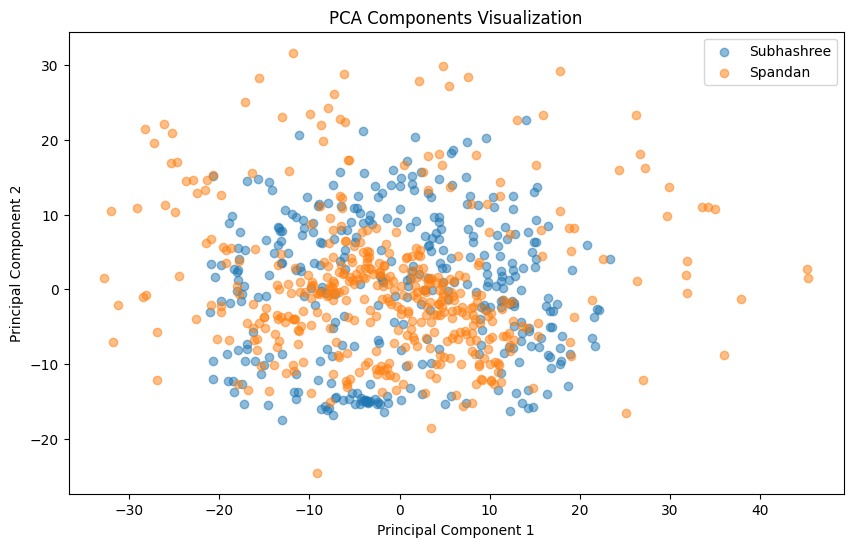

In [ ]:
import matplotlib.pyplot as plt

# Visualize PCA components
plt.figure(figsize=(10, 6))
plt.scatter(subhashree_images_pca[:, 0], subhashree_images_pca[:, 1], label='Subhashree', alpha=0.5)
plt.scatter(spandan_images_pca[:, 0], spandan_images_pca[:, 1], label='Spandan', alpha=0.5)
plt.title('PCA Components Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()